# Economics Ph.D. Job Placement Data
> **Author**
- [Amedeus D'Souza, Vancouver School of Economics](https://sites.google.com/view/aadsouza)

> **Contributors**
- Abby Bu, Vancouver School of Economics
- [Felipe Grosso, Vancouver School of Economics](https://www.linkedin.com/in/felipe-grosso/)
- Caroline Luo, Vancouver School of Economics
- Wenxin Ma, Vancouver School of Economics
- [Michael Peters, Vancouver School of Economics](https://montoya.econ.ubc.ca)
- Yongli Shi, Vancouver School of Economics
- Hongkai Yu, Vancouver School of Economics

On this dashboard we present geodetic plots that show the flows of Ph.D. graduates' placements. We sourced publically available data on the placements of Ph.D. graduates, including the institution where each applicant graduated from and the institution where they found a job. We added horizontal position representations (specifically latitudes and longitudes) to each of the institutions. It is worth noting that we restrict our analysis to applicants that were placed after 2008 and focus on institutions with economics departments ranked in the top 100 according to rankings compiled by Tilburg University in 2016.

We organize the maps by four categories: institution where the appliant graduated from, their primary specialization, type of position, and placement year. Notice that the dropdown allows you to select a basket of institutions for which you'd like the map to be generated. Below the map, the same data is presented as a table for convenience.

## Data Limitations

The limitations of the data include:
- Certain institutions do not publish placement lists with names. We are working on searching for these applicants through LinkedIn profiles, professional websites, and published resumes and curricula vitae. Thus, regression analyses may be susceptible to selection bias. Please refer to the barplots in the next section to learn more about the coverage of the data.
- Plots converging in the Gulf of Guinea at the intersection of the Equator and the Prime Meridian are institutions for which we currently do not have horizontal position representations.
- The population of graduates from institutions outside the United States, Canada, and Western Europe are underrepresented in the sample.
- Recruiter types are self reported by the institutions.
- There may be ambiguity in the assignment of positions. In particular, "Lecturers" at certain institutions - in particular European institutions - are indeed "Assistant Professors". Similarly, there are instances of ambiguity between "Post-Docs" and Visiting Assistant Professors, the latter of which are classified as "Visiting Professor/Lecturer/Instructor". Instructors and Assisant Professors of Teaching are classified as "Visiting Professor/Lecturer/Instructor", "Lecturer", or "Assistant Professor".

## Coverage

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import IPython
import mysql.connector as sql
import numpy as np
import warnings
warnings.filterwarnings('ignore')

db_connection = sql.connect(host='127.0.0.1', database='econjobmarket_research', user='amedeus', password='amedeus')

db_cursor = db_connection.cursor(dictionary=True)

db_cursor.execute('select * from to_data t join from_data f on t.aid=f.aid where to_latitude is not null and latitude is not null and category_id in (1,2,6,7,10,12,13,15,16,23)')

inst_data = pd.DataFrame(db_cursor.fetchall())

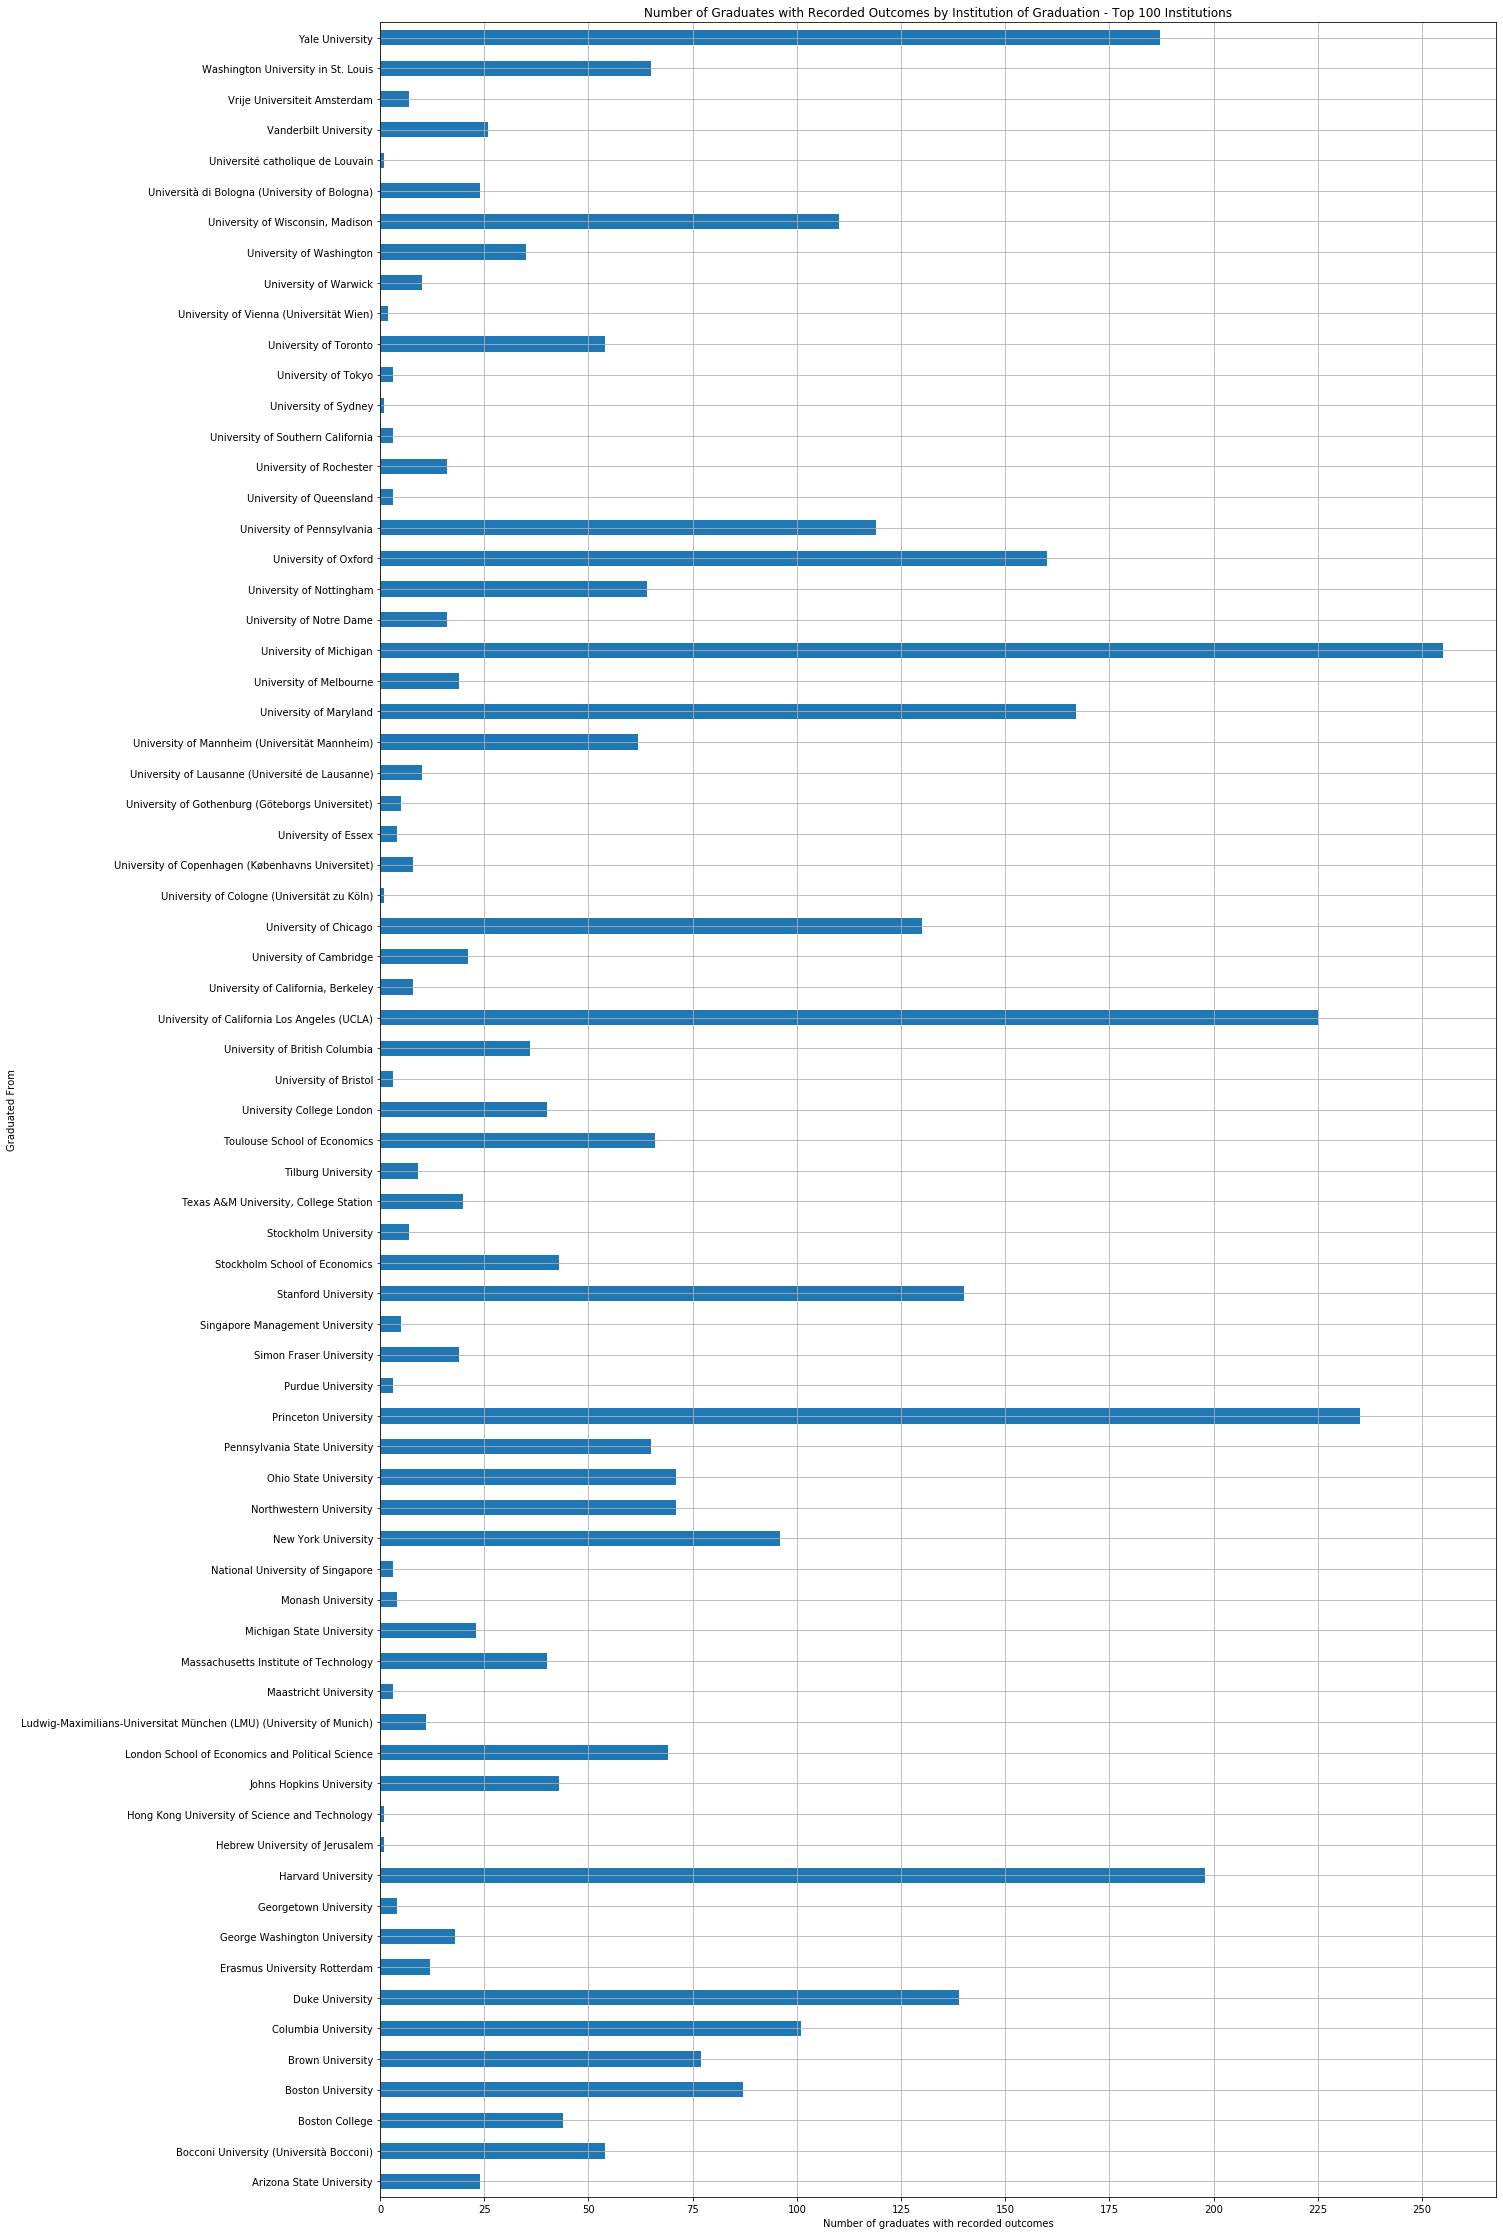

In [2]:
#by institution name - multiple oid for same name
inst_data_top100 = inst_data.loc[(inst_data["rank"] <= 100) & (inst_data["rank"] > 0)]

fig, ax = plt.subplots(figsize = (20, 40))
inst_group_count_top100 = inst_data_top100.groupby(by = "from_institution_name").count()["aid"]
inst_group_count_top100.plot.barh(ax = ax)
ax.set_xlabel("Number of graduates with recorded outcomes")
ax.set_ylabel("Graduated From")
x_ticks = np.arange(0, 275, 25)
ax.set_xticks(x_ticks)
ax.set_title("Number of Graduates with Recorded Outcomes by Institution of Graduation - Top 100 Institutions")
ax.grid()

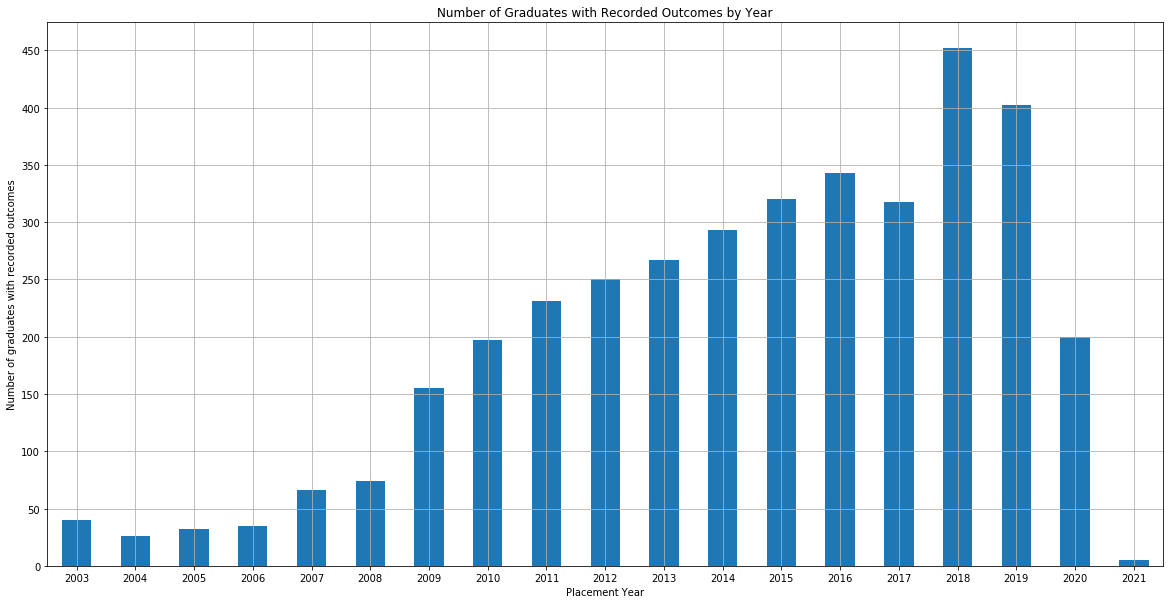

In [3]:
fig, ax = plt.subplots(figsize = (20, 10))
inst_data_top100["year"] = pd.DatetimeIndex(inst_data_top100["startdate"]).year
year_group_count_top100 = inst_data_top100.groupby(by = "year").count()["aid"]
year_group_count_top100.plot.bar(ax = ax, rot = 0)
ax.set_xlabel("Placement Year")
ax.set_ylabel("Number of graduates with recorded outcomes")
y_ticks = np.arange(0, 500, 50)
ax.set_yticks(y_ticks)
ax.set_title("Number of Graduates with Recorded Outcomes by Year")
ax.grid()